## classifying tiny digit images with MLP from scratch

10-class recognition problem, one hidden layer, square loss (solution of "mlp2")
- implement full-batch vectorized gradient descent
- monitor train and test error
- compute accuracies
- play with parameters
- add biases
- change to softmax laeyr with logistic loss

In [51]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# main parameters
iterNum = 10000
stepSize = 10.0
hiddenSize = 10
trainNum = 800
displayFlag = True

# Display plots inline 
%matplotlib inline

bounded smooth non-linearity: 
$\sigma(x) = \frac{1}{1+\exp(-x)},\quad\sigma'(x) = \sigma(x)(1-\sigma(x))$

In [43]:
# compute sigmoid
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)

In [44]:
# load and prepare dataset
digits = datasets.load_digits()
X_all = digits.data.T
y = digits.target
dataNum = X_all.shape[1]
labels = digits.target_names
outSize = labels.size 
inputSize = X_all.shape[0]

# building gt one-hot vectors 
Y_all = np.zeros((outSize,dataNum))
for n in range(dataNum):  
    Y_all[y[n],n] = 1 

# extract training and tet sets
testNum = dataNum - trainNum
X = X_all[:,:trainNum]
Y = Y_all[:,:trainNum]
X_test = X_all[:,trainNum:]
Y_test = Y_all[:,trainNum:]
print('%d training examples and %d test examples' % (trainNum,testNum))

800 training examples and 997 test examples


In [45]:
# initialize weights randomly with mean 0
# np.random.seed(1)
W1 = np.random.randn(hiddenSize,inputSize)
W2 = np.random.randn(outSize,hiddenSize)

activation (no bias): $a_{\ell} = Wx_{\ell-1}$, output: $x_{\ell} = \sigma(a_{\ell})$  

square loss: $\frac{1}{2N} \sum_{n=1}^{N} \|x_2^{(n)}-y^{(n)}\|^2$

In [46]:
# compute batch loss and loss gradient  
def loss(pred,target): 
    return 0.5 * np.sum(np.square(pred-target),0)
 
def lossGrad(pred,target):
    return (pred - target)

In [47]:
trainError = np.zeros(iterNum)
testError = np.zeros(iterNum)

for iter in range(iterNum):

    # forward propagation on training and test data
    X0 = X
    A1 = np.dot(W1,X0)  
    X1 = sigmoid(A1)
    A2 = np.dot(W2,X1)
    X2 = sigmoid(A2)    
    
    # X2_test = np.zeros(Y_test.shape) # TBC 
    X2_test = sigmoid(np.dot(W2,sigmoid(np.dot(W1,X_test)))) # TBC 
    
    # compute and print mean error on both datasets 
    trainError[iter] = np.mean(loss(X2,Y))
    testError[iter]  = np.mean(loss(X2_test,Y_test))
    if (iter% 1000) == 0 :
        print("Train/test error after %d iterations: %.4f / %.4f" % (iter,  trainError[iter], testError[iter]))
   
    # back propagation of training errors
    G2 = lossGrad(X2,Y)
    H2 = G2 * sigmoid_output_to_derivative(X2)
    G1 = np.dot(W2.T,H2)
    H1 = G1 * sigmoid_output_to_derivative(X1)
    
    dW1 = np.dot(H1,X0.T) / trainNum 
    dW2 = np.dot(H2,X1.T) / trainNum
    
    # Updating weights
    W2 -= stepSize * dW2
    W1 -= stepSize * dW1

Train/test error after 0 iterations: 1.4941 / 1.4997
Train/test error after 1000 iterations: 0.1018 / 0.1517
Train/test error after 2000 iterations: 0.0236 / 0.1266
Train/test error after 3000 iterations: 0.0195 / 0.1235
Train/test error after 4000 iterations: 0.0183 / 0.1205
Train/test error after 5000 iterations: 0.0172 / 0.1195
Train/test error after 6000 iterations: 0.0167 / 0.1204
Train/test error after 7000 iterations: 0.0165 / 0.1184
Train/test error after 8000 iterations: 0.0162 / 0.1155
Train/test error after 9000 iterations: 0.0160 / 0.1182


In [48]:
# test accuracy
accuracy = float(0);
for id in range(testNum):
    if np.argmax(X2_test[:,id]) == np.argmax(Y_test[:,id]):
        accuracy += 1
accuracy = accuracy / testNum
print('Accuracy : %.4f' % accuracy)

Accuracy : 0.8686


In [49]:
# training and test plots
if displayFlag:
    plt.figure(figsize=(4,4))
    plt.plot(range(iterNum),trainError,'b',range(iterNum),testError,'r',)
    plt.show()

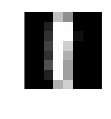

true: 1, predicted: 1


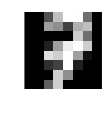

true: 7, predicted: 7


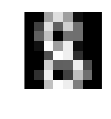

true: 8, predicted: 8


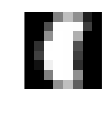

true: 1, predicted: 1


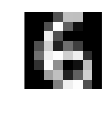

true: 6, predicted: 6


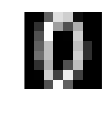

true: 0, predicted: 0


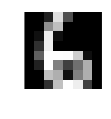

true: 6, predicted: 6


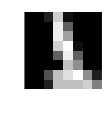

true: 1, predicted: 1


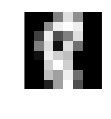

true: 8, predicted: 8


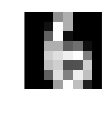

true: 6, predicted: 6


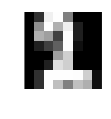

true: 2, predicted: 2


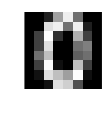

true: 0, predicted: 0


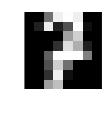

true: 7, predicted: 7


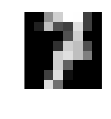

true: 7, predicted: 7


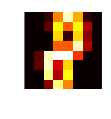

true: 4, predicted: 8


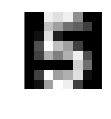

true: 5, predicted: 5


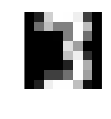

true: 3, predicted: 3


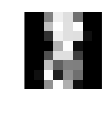

true: 8, predicted: 8


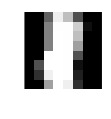

true: 1, predicted: 1


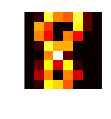

true: 5, predicted: 8


In [52]:
# visualize randomly picked test predictions
if displayFlag:
    sampleId = np.random.randint(0,testNum,20)
    for id in sampleId:
        if np.argmax(X2_test[:,id]) != y[id+trainNum] :
            colormap = 'hot'
        else: 
            colormap = 'gray'
        plt.figure(figsize=(1,1))
        plt.imshow(digits.images[id+trainNum],interpolation='none',cmap=colormap)
        plt.axis('off')
        plt.show()
        print('true: %d, predicted: %d' % (np.argmax(X2_test[:,id]) , y[id+trainNum]))